Solution For - https://www.kaggle.com/c/bike-sharing-demand/data

**Data Fields**

1. **datetime** - hourly date + timestamp  
2. **season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
3. **holiday** - whether the day is considered a holiday
4. **workingday** - whether the day is neither a weekend nor holiday
5. **weather** - 
    1. Clear, Few clouds, Partly cloudy, Partly cloudy 
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
6. **temp** - temperature in Celsius
7. **atemp** - "feels like" temperature in Celsius
8. **humidity** - relative humidity
9. **windspeed** - wind speed
10. **casual** - number of non-registered user rentals initiated
11. **registered** - number of registered user rentals initiated
12. **count** - number of total rentals

In [56]:
import pandas as pd

In [57]:
train = pd.read_csv("train.csv")

In [58]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [60]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [61]:
train.rename(columns={'count' : 'total'}, inplace=True)

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

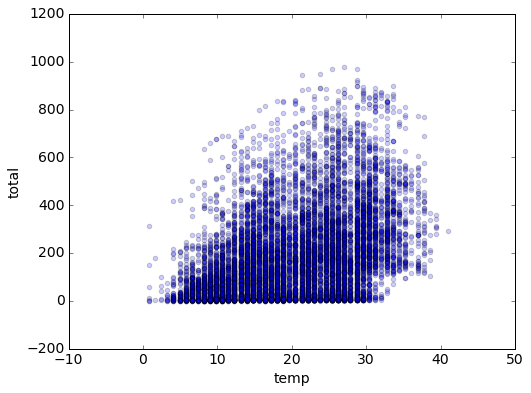

In [63]:
train.plot(x='temp', y='total', kind='scatter', alpha=0.2)

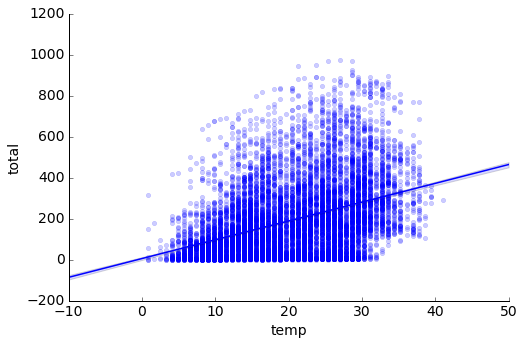

In [64]:
sns.lmplot(x='temp',y='total', data= train, aspect=1.5, scatter_kws={'alpha':0.2})

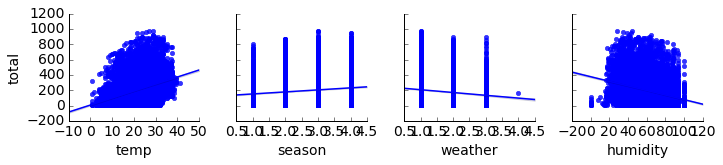

In [65]:
featured_col = ['temp', 'season', 'weather', 'humidity']
sns.pairplot(train, x_vars=featured_col, y_vars='total', kind='reg')

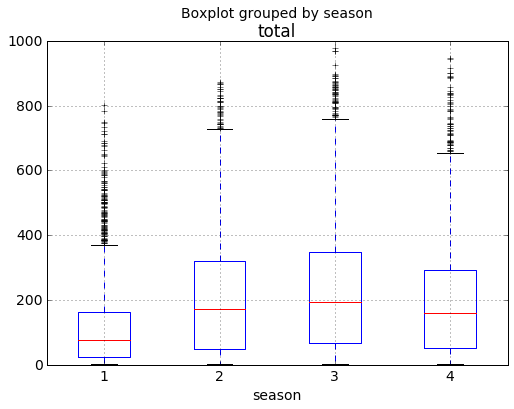

In [66]:
train.boxplot(column='total', by='season')

In [67]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


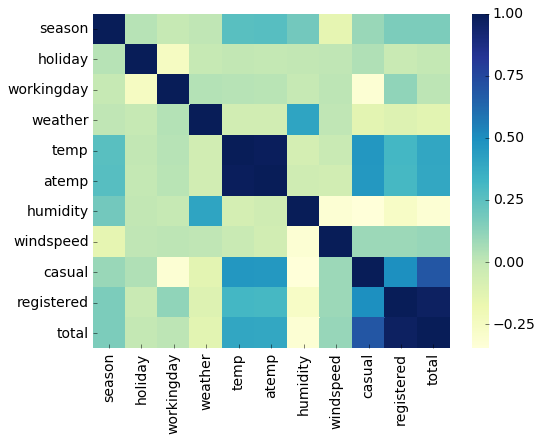

In [68]:
sns.heatmap(train.corr(), cmap='YlGnBu')

In [69]:
X = train[featured_col]
y = train.total

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
linear_model = LinearRegression()

In [72]:
linear_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
test_x = train[featured_col]

prediction = linear_model.predict(test_x)

In [74]:
linear_model.coef_

array([  7.86482499,  22.53875753,   6.67030204,  -3.11887338])

In [75]:
linear_model.intercept_

159.52068786129817

In [76]:
featured_col

['temp', 'season', 'weather', 'humidity']

In [77]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np

In [78]:
def train_test_rmse(feature_cols):
    X = train[feature_cols]
    y = train.total
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [79]:
print train_test_rmse(['temp', 'season', 'weather', 'humidity'])
print train_test_rmse(['temp', 'season', 'weather'])
print train_test_rmse(['temp', 'season', 'humidity'])
print train_test_rmse(['temp', 'season', 'weather', 'holiday', 'windspeed'])
print train_test_rmse(['temp', 'season'])
print train_test_rmse(['casual', 'registered'])

155.649459131
164.165399763
155.598189367
162.708367575
165.915959067
6.46507997608e-14


In [80]:
season_dummies = pd.get_dummies(train.season, prefix='season')
# print 5 random rows
season_dummies.sample(n=5, random_state=1)

,season_1,season_2,season_3,season_4
3709,0.0,0.0,1.0,0.0
6741,1.0,0.0,0.0,0.0
9848,0.0,0.0,0.0,1.0
1410,0.0,1.0,0.0,0.0
10672,0.0,0.0,0.0,1.0


In [81]:
season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)

# print 5 random rows
season_dummies.sample(n=5, random_state=1)

,season_2,season_3,season_4
3709,0.0,1.0,0.0
6741,0.0,0.0,0.0
9848,0.0,0.0,1.0
1410,1.0,0.0,0.0
10672,0.0,0.0,1.0


In [82]:
train = pd.concat([train, season_dummies], axis=1)

# print 5 random rows
train.sample(n=5, random_state=1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,season_2,season_3,season_4
3709,2011-09-05 11:00:00,3,1,0,2,28.70,33.335,74,11.0014,101,207,308,0.0,1.0,0.0
6741,2012-03-18 04:00:00,1,0,0,2,17.22,21.210,94,11.0014,6,8,14,0.0,0.0,0.0
9848,2012-10-14 17:00:00,4,0,0,1,26.24,31.060,44,12.9980,193,346,539,0.0,0.0,1.0
1410,2011-04-04 15:00:00,2,0,1,1,31.16,33.335,23,36.9974,47,96,143,1.0,0.0,0.0
10672,2012-12-11 02:00:00,4,0,1,2,16.40,20.455,66,22.0028,0,1,1,0.0,0.0,1.0


In [83]:
feature_cols = ['temp', 'season_2', 'season_3', 'season_4', 'humidity']
X = train[feature_cols]
y = train.total
linreg = LinearRegression()
linreg.fit(X, y)
zip(feature_cols, linreg.coef_)

[('temp', 11.186405863575784),
 ('season_2', -3.3905430997179598),
 ('season_3', -41.736860713170678),
 ('season_4', 64.415961468242145),
 ('humidity', -2.819481636259646)]

In [84]:
print train_test_rmse(['temp', 'season', 'humidity'])
print train_test_rmse(['temp', 'season_2', 'season_3', 'season_4', 'humidity'])

155.598189367
154.333945936


In [85]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,season_2,season_3,season_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0.0,0.0,0.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0.0,0.0,0.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0.0,0.0,0.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0.0,0.0,0.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0.0,0.0,0.0


In [86]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['hours'] = train['datetime'].apply(lambda x: x.hour)

In [87]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,season_2,season_3,season_4,hours
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0.0,0.0,0.0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0.0,0.0,0.0,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0.0,0.0,0.0,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0.0,0.0,0.0,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0.0,0.0,0.0,4


In [88]:
dummies_hour = pd.get_dummies(train.hours, prefix='hour')
dummies_hour.drop(dummies_hour.columns[0], axis=1, inplace=True)

train = pd.concat([train, dummies_hour], axis=1)

In [89]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
# daytime as a categorical feature
train['daytime'] = ((train.hours > 6) & (train.hours < 21)).astype(int)

In [91]:
X = train.drop(['casual','registered','total'], axis=1)
y = train.total

In [92]:
y.head()

0    16
1    40
2    32
3    13
4     1
Name: total, dtype: int64

In [93]:
X.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_2,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,daytime
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
y_train.head()
linear = LinearRegression()
linear.fit(X_train, y_train)

TypeError: float() argument must be a string or a number

In [95]:
from sklearn.linear_model import Lasso

def train_test_rmse_lasso(alpha):
    X = train.drop(['casual','registered','total'], axis=1)
    y = train.total
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = Lasso(alpha=alpha)
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [96]:
alpha_values = np.arange(0.1, 1.0, 0.1)
for alpha in alpha_values:
    print alpha, train_test_rmse_lasso(alpha)

0.1

TypeError: float() argument must be a string or a number

In [51]:
# import test.csv

test = pd.read_csv("test.csv")
test.head()
# Transform season

test_season_dummies = pd.get_dummies(test.season, prefix='season')
test_season_dummies.drop(test_season_dummies.columns[0], axis=1, inplace=True)
test = pd.concat([test, test_season_dummies], axis=1)

# Transform Date

test['datetime'] = pd.to_datetime(test['datetime'])
test['hours'] = test['datetime'].apply(lambda x: x.hour)

test_dummies_hour = pd.get_dummies(test.hours, prefix='hour')
test_dummies_hour.drop(test_dummies_hour.columns[0], axis=1, inplace=True)

test = pd.concat([test, test_dummies_hour], axis=1)

test['daytime'] = ((test.hours > 6) & (test.hours < 21)).astype(int)

test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_2,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,daytime
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 40 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
total         10886 non-null int64
season_2      10886 non-null float64
season_3      10886 non-null float64
season_4      10886 non-null float64
hours         10886 non-null int64
hour_1        10886 non-null float64
hour_2        10886 non-null float64
hour_3        10886 non-null float64
hour_4        10886 non-null float64
hour_5        10886 non-null float64
hour_6        10886 non-null float64
hour_7        10886 non-null float64
hour_8        10886 non-null float64
hour_9        

In [53]:
from sklearn.tree import DecisionTreeRegressor

y = train.total
X = train.drop(['total','casual','registered'], axis=1, inplace=False)

In [54]:
lasso_reg = LinearRegression()
lasso_reg.fit(X, y)

TypeError: float() argument must be a string or a number

In [41]:
test.info()
X_test = test.drop(['total','casual','registered'], axis=1, inplace=False)
y_pred = lasso_reg.predict(X_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 37 columns):
datetime      6493 non-null datetime64[ns]
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
season_2      6493 non-null float64
season_3      6493 non-null float64
season_4      6493 non-null float64
hours         6493 non-null int64
hour_1        6493 non-null float64
hour_2        6493 non-null float64
hour_3        6493 non-null float64
hour_4        6493 non-null float64
hour_5        6493 non-null float64
hour_6        6493 non-null float64
hour_7        6493 non-null float64
hour_8        6493 non-null float64
hour_9        6493 non-null float64
hour_10       6493 non-null float64
hour_11       6493 non-null float64
hour_12       6493 non-null float6

ValueError: labels ['total' 'casual' 'registered'] not contained in axis

In [42]:
submission = pd.DataFrame({
        "datetime": test["datetime"],
        "count": [max(0, x) for x in y_pred]
    })
submission.head()

NameError: name 'y_pred' is not defined

In [115]:
submission.to_csv('bike_predictions.csv', index=False)

In [110]:
# Linear Regression is not doing good, lets try Decision tree